# A2
In order for the notebook to work, the samples provided in class need to be extracted into ./media/audio/Original

## T1

In [1]:
import essentia
import essentia.standard

# loader = essentia.standard.MonoLoader(filename='./media/audio/Original/gui_gref_e_mf_sol3_12.wav')
loader = essentia.standard.MonoLoader(filename='./media/audio/sine.wav')

audio = loader()

import IPython
# IPython.display.Audio('./media/audio/Original/gui_gref_e_mf_sol3_12.wav')
IPython.display.Audio('./media/audio/sine.wav')

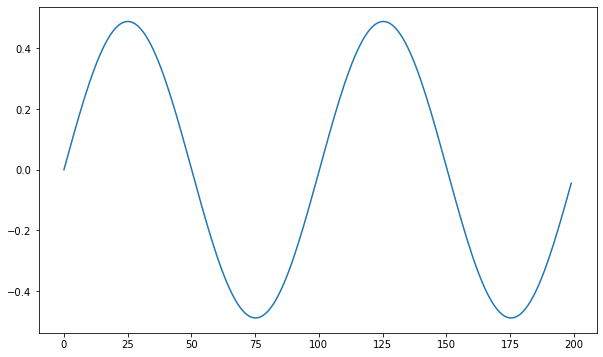

In [34]:
# pylab contains the plot() function, as well as figure, etc... (same names as Matlab)
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6) # set plot sizes to something larger than default

plot(audio[0:200])
plt.show()

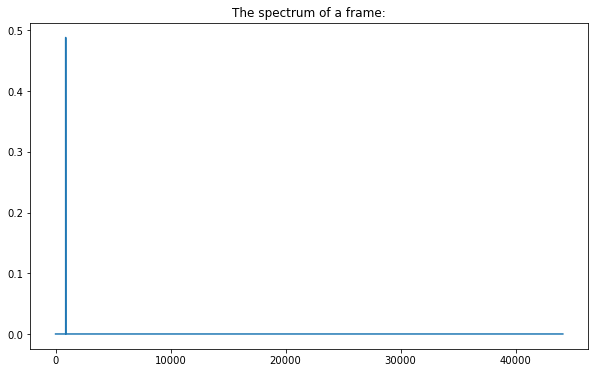

In [35]:
from essentia.standard import Spectrum
from essentia.standard import Windowing

w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
spec = spectrum(w(audio))

plt.rcParams['figure.figsize'] = (10, 6) # set plot sizes to something larger than default
plt.title("The spectrum of a frame:")

plot(spec)
show()

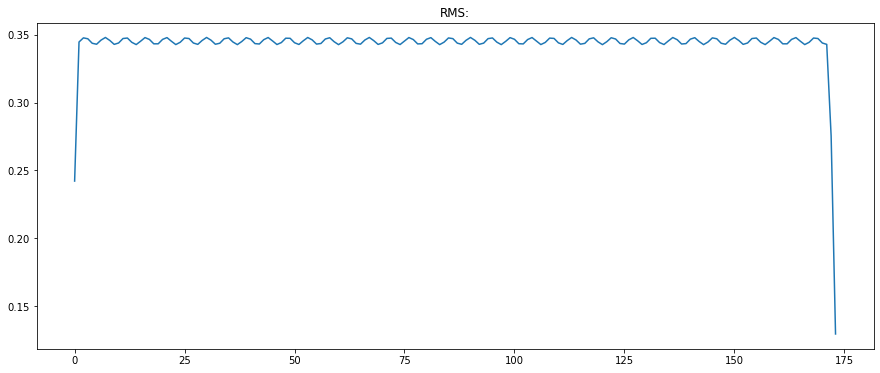

RMS mean  0.34301140904426575 W


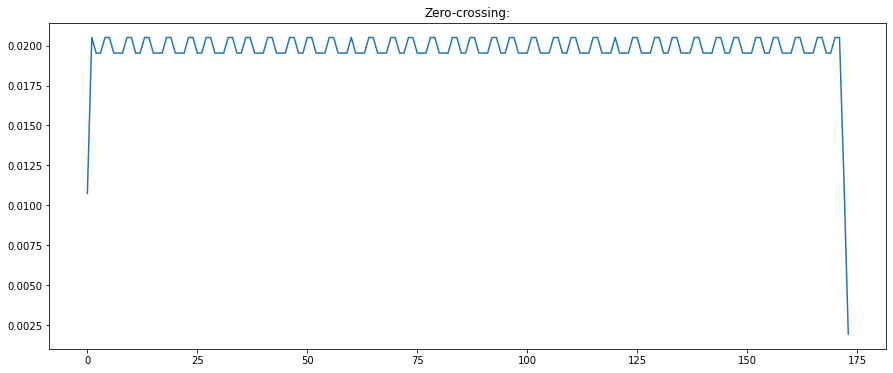

Zero-crossing mean:  870.7334585487843 Hz
Zero-crossing mean:  879.243765771389 Hz


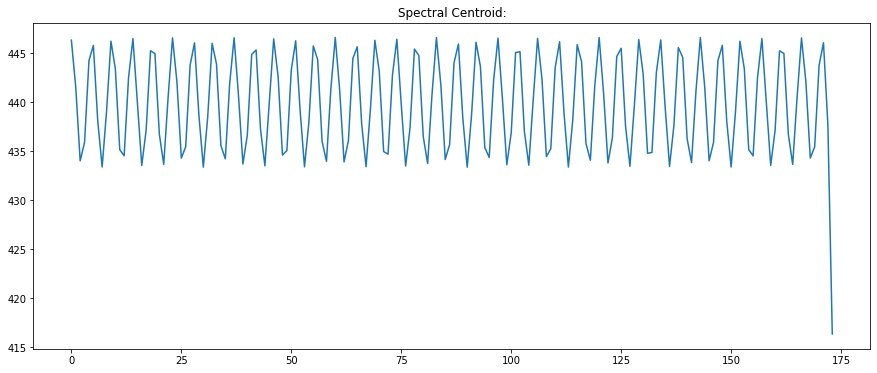

Spectral Centroid mean:  439.84918212890625 Hz


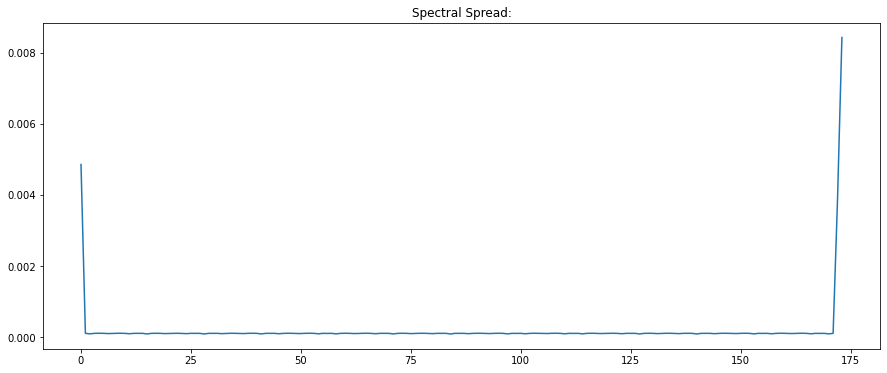

Spectral Spread mean:  0.0001980478409677744 Hz


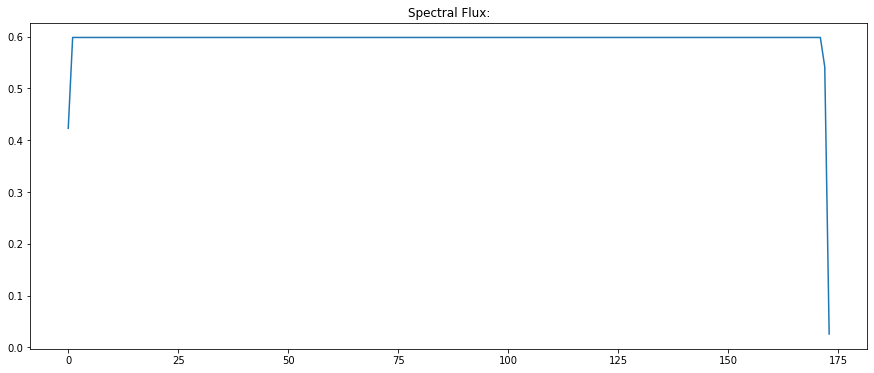

Spectral Flux mean:  0.5936663150787354


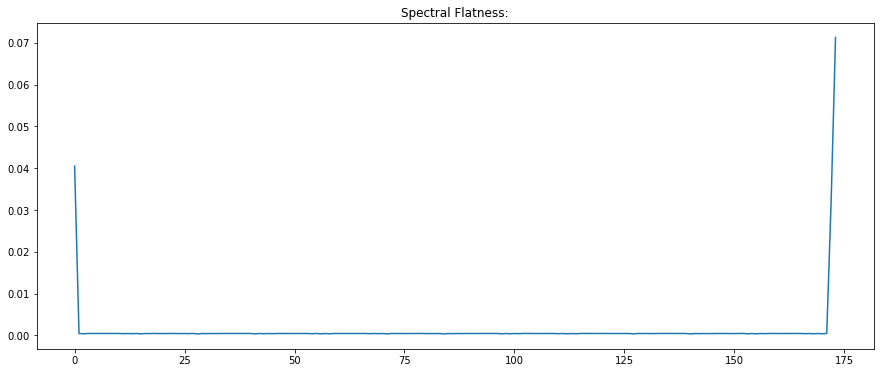

Spectral Flatness mean:  0.0012589528923854232


In [84]:
from essentia.standard import *

pool = essentia.Pool()

for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512): # This sizes are in samples, it seems
    pool.add('lowlevel.rms', RMS()(frame))
    pool.add('lowlevel.zerocrossing', ZeroCrossingRate()(frame))
    pool.add('lowlevel.spectralcentroid', SpectralCentroidTime()(frame))
    pool.add('lowlevel.spectralspread', DistributionShape()(CentralMoments()(spectrum(w(frame))))[0])
    pool.add('lowlevel.spectralflux', Flux()(spectrum(w(frame))))
    pool.add('lowlevel.spectralflatness', Flatness()(spectrum(w(frame))))

# Auto statistics
agg = PoolAggregator(defaultStats = ['mean', 'var', 'min', 'max'])(pool)

plt.title("RMS:")
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default
plot(pool['lowlevel.rms'])

show()

print('RMS mean ', agg['lowlevel.rms.mean'], 'W') # 0.5 / sqrt(2) OK

plt.title("Zero-crossing:")
plot(pool['lowlevel.zerocrossing'])

show()

print('Zero-crossing mean: ', agg['lowlevel.zerocrossing.mean'] * 44100, 'Hz') # ~870 OKish
print('Zero-crossing mean: ', numpy.mean(pool['lowlevel.zerocrossing'][25:150]) * 44100, 'Hz')

plt.title("Spectral Centroid:")
plot(pool['lowlevel.spectralcentroid'])

show()

print('Spectral Centroid mean: ', agg['lowlevel.spectralcentroid.mean'], 'Hz') # ~440 OK


plt.title("Spectral Spread:")
plot(pool['lowlevel.spectralspread'])

show()

print('Spectral Spread mean: ', agg['lowlevel.spectralspread.mean'], 'Hz') # ~0 OK

plt.title("Spectral Flux:")
plot(pool['lowlevel.spectralflux'])

show()

print('Spectral Flux mean: ', agg['lowlevel.spectralflux.mean']) # ~0 OK

plt.title("Spectral Flatness:")
plot(pool['lowlevel.spectralflatness'])

show()

print('Spectral Flatness mean: ', agg['lowlevel.spectralflatness.mean']) # ~0 OK?? 

